<a href="https://colab.research.google.com/github/vngeno/KNN-AND-NAIVE-BAYES-CLASSIFICATION-MODEL/blob/main/SPAM_EMAIL_PREDICTION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

We will work as data scientists for a company to build a model that predicts whether or not an email is spam or non spam

### b) Metric of Success

We will create a model that will allow the company to accurately predict wether an email is spam or non spam and be able to achieve an accuracy score of at least 80% but not more than 85%

### c) Understanding the context 


Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

### d) Recording the Experimental Design


Our analysis will take the below flow:

1.)Defining the question

2.)Data Understanding

3.)Exploratory Data Analysis

4.)Implementing the Solution

5.)Challenging the Solution

6.)Conclusion

## 2. Reading the Data

In [38]:

import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the spambase dataset
# Loading the names files first so that we can use the column names in our dataset
with open('/content/spambase (5).names') as f:
  print(f.read())

# Reading the spambase dataset
data = pd.read_csv('/content/spambase (1).data', header=None)


# Renaming the columns in our dataset
data.columns = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','class']



| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [3]:
#Checking the appropriate data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [4]:
#Our dataset has 4601 rows and 58 columns
data.shape

(4601, 58)

## 5. Tidying the Dataset

In [5]:
#Checking each column
data.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


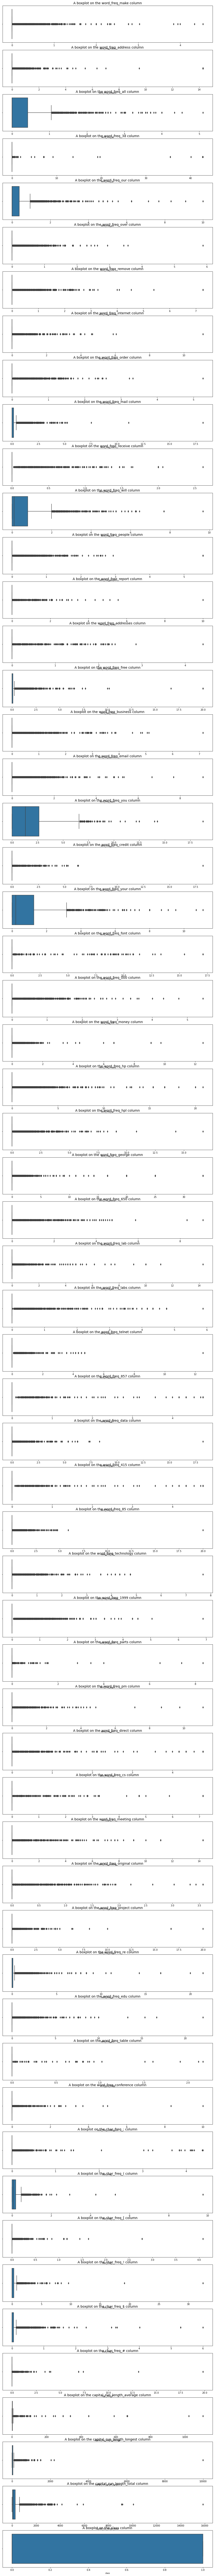

In [6]:
#Checking for Outliers


cols = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']
fig, ax = plt.subplots(len(cols), figsize = (16,200))
for i, col_val in enumerate(cols):

    sns.boxplot(x = data[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

From the above, the outliers are many and it's better to work with them in order to get acurate results in our analysis and prediction. 

In [7]:
# Identifying the Missing Data - Our dataset has no missing values and that's good
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [8]:
#Checking for duplicates
data.duplicated().sum()

391

In [9]:
#Dealing with the Duplicate Data

data= data.drop_duplicates()

In [10]:
#Standardizing the columns
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

## 6. Exploratory Analysis

###Univariate Analysis

**Measures of Central Tendency**

In [11]:
#The summary statistics are as follows
data.describe(include='all')

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00,4210.00
mean,0.10,0.11,0.29,0.06,0.33,0.10,0.12,0.11,0.09,0.25,0.06,0.57,0.10,0.06,0.04,0.25,0.15,0.19,1.72,0.08,0.81,0.13,0.10,0.09,0.57,0.28,0.37,0.13,0.10,0.10,0.06,0.04,0.10,0.05,0.11,0.10,0.14,0.01,0.08,0.06,0.04,0.14,0.05,0.09,0.32,0.19,0.01,0.03,0.04,0.14,0.02,0.28,0.08,0.05,5.38,52.14,291.18,0.40
std,0.30,0.45,0.52,1.35,0.69,0.28,0.40,0.41,0.28,0.66,0.18,0.88,0.31,0.35,0.24,0.80,0.46,0.54,1.77,0.51,1.15,1.07,0.35,0.43,1.68,0.91,1.78,0.54,0.58,0.44,0.39,0.30,0.57,0.30,0.53,0.39,0.42,0.23,0.45,0.32,0.32,0.79,0.23,0.65,1.05,0.93,0.08,0.30,0.25,0.27,0.11,0.84,0.24,0.44,33.15,199.58,618.65,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.63,7.00,40.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.00,0.00,0.00,0.00,0.00,0.00,1.36,0.00,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.02,0.00,0.00,2.30,15.00,101.50,0.00
75%,0.00,0.00,0.44,0.00,0.41,0.00,0.00,0.00,0.00,0.19,0.00,0.83,0.00,0.00,0.00,0.13,0.00,0.00,2.72,0.00,1.28,0.00,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.00,0.00,0.19,0.00,0.33,0.05,0.00,3.71,44.00,273.75,1.00
max,4.54,14.28,5.10,42.81,10.00,5.88,7.27,11.11,5.26,18.18,2.61,9.67,5.55,10.00,4.41,20.00,7.14,9.09,18.75,18.18,11.11,17.10,5.45,12.50,20.83,16.66,33.33,9.09,14.28,5.88,12.50,4.76,18.18,4.76,20.00,7.69,6.89,8.33,11.11,4.76,7.14,14.28,3.57,20.00,21.42,22.05,2.17,10.00,4.38,9.75,4.08,32.48,6.00,19.83,1102.50,9989.00,15841.00,1.00


In [12]:
data.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.78,0.00,0.00,3.76,61,278,1
1,0.21,0.28,0.50,0.00,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.00,0.43,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.00,0.37,0.18,0.05,5.11,101,1028,1


In [40]:
#We will calculate the Kurtosis to check further for outliers and spread of our data
col = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']
x = {}

for col in col:
    x[col] = data[col].kurt()
z = pd.Series(x)
z = z.to_numpy()
z

array([  54.35140555,  306.68597331,   12.94144689,  788.37005791,
         37.0648008 ,   71.60326696,   76.38164732,  167.5502194 ,
         48.01137349,  162.53903333,   34.65611932,   12.0960683 ,
         82.59629686,  219.64515484,   69.49380879,  157.69174157,
         43.51418437,   48.15746076,    4.99806593,  424.68577079,
          8.09420344,   99.6660893 ,   49.11994834,  340.17577316,
         43.18244607,   63.07287145,  111.09982389,   58.66924805,
        189.40865455,   49.10534901,  302.36989658,  128.29577383,
        290.7362214 ,  126.43714978,  491.54163332,   79.9880443 ,
         40.88796449,  836.22927235,  205.95919842,  101.12015896,
        166.2616943 ,  108.99465195,   73.79537653,  449.01771688,
        122.0675225 ,  150.11954091,  431.30924715,  492.14694547,
        200.44978656,  404.37013815,  664.62037825,  579.43846355,
        188.46269204, 1238.32101799,  614.39988512, 1471.21560974,
        146.10842847,   -1.82992868])

In [42]:
#We will now calculate the Skewness to check the spread of our data

x = {}
col = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']
for col in col:
    x[col] = data[col].skew()
z = pd.Series(x)
z = z.to_numpy()
z

array([ 5.86985524, 13.46466362,  2.98062276, 27.20953914,  4.69694566,
        6.12265299,  6.80870719,  9.73423187,  5.28430604,  8.56857863,
        5.07828075,  2.82800467,  6.88995163, 11.5641417 ,  7.5133754 ,
        9.38774512,  5.56766843,  5.45386682,  1.52425083, 15.43017442,
        2.24570681,  9.54153334,  5.85952404, 15.55668224,  5.63883406,
        6.29747143,  9.4815818 ,  6.51799803, 11.68359123,  6.38083088,
       13.5148523 , 10.43246266, 13.06935467, 10.339838  , 16.00176232,
        7.35877531,  5.12662048, 27.07869402, 11.76230346,  9.10184682,
       11.46880564,  9.18515734,  7.40822617, 18.19682374,  8.9178665 ,
       10.07703447, 19.29848506, 18.87175667, 13.3558852 , 14.00266553,
       21.27198188, 18.33727779, 10.60896958, 31.50018012, 22.76065506,
       31.20549507,  8.80164099,  0.41344996])

From the above, our dataset is Leptokurtic: The distribution has fatter tails and a sharper peak. Majority of columns' kurtosis is “positive” with a value greater than 3. kurtosis measures outliers. 

We've also noted a positive skew in the columns and generally our data. This is when the right tail of the histogram of the distribution is longer and the majority of the observations are concentrated on the left tail. In this case, we can use also the term “right-skewed” or “right-tailed”. and the median is less than the mean.

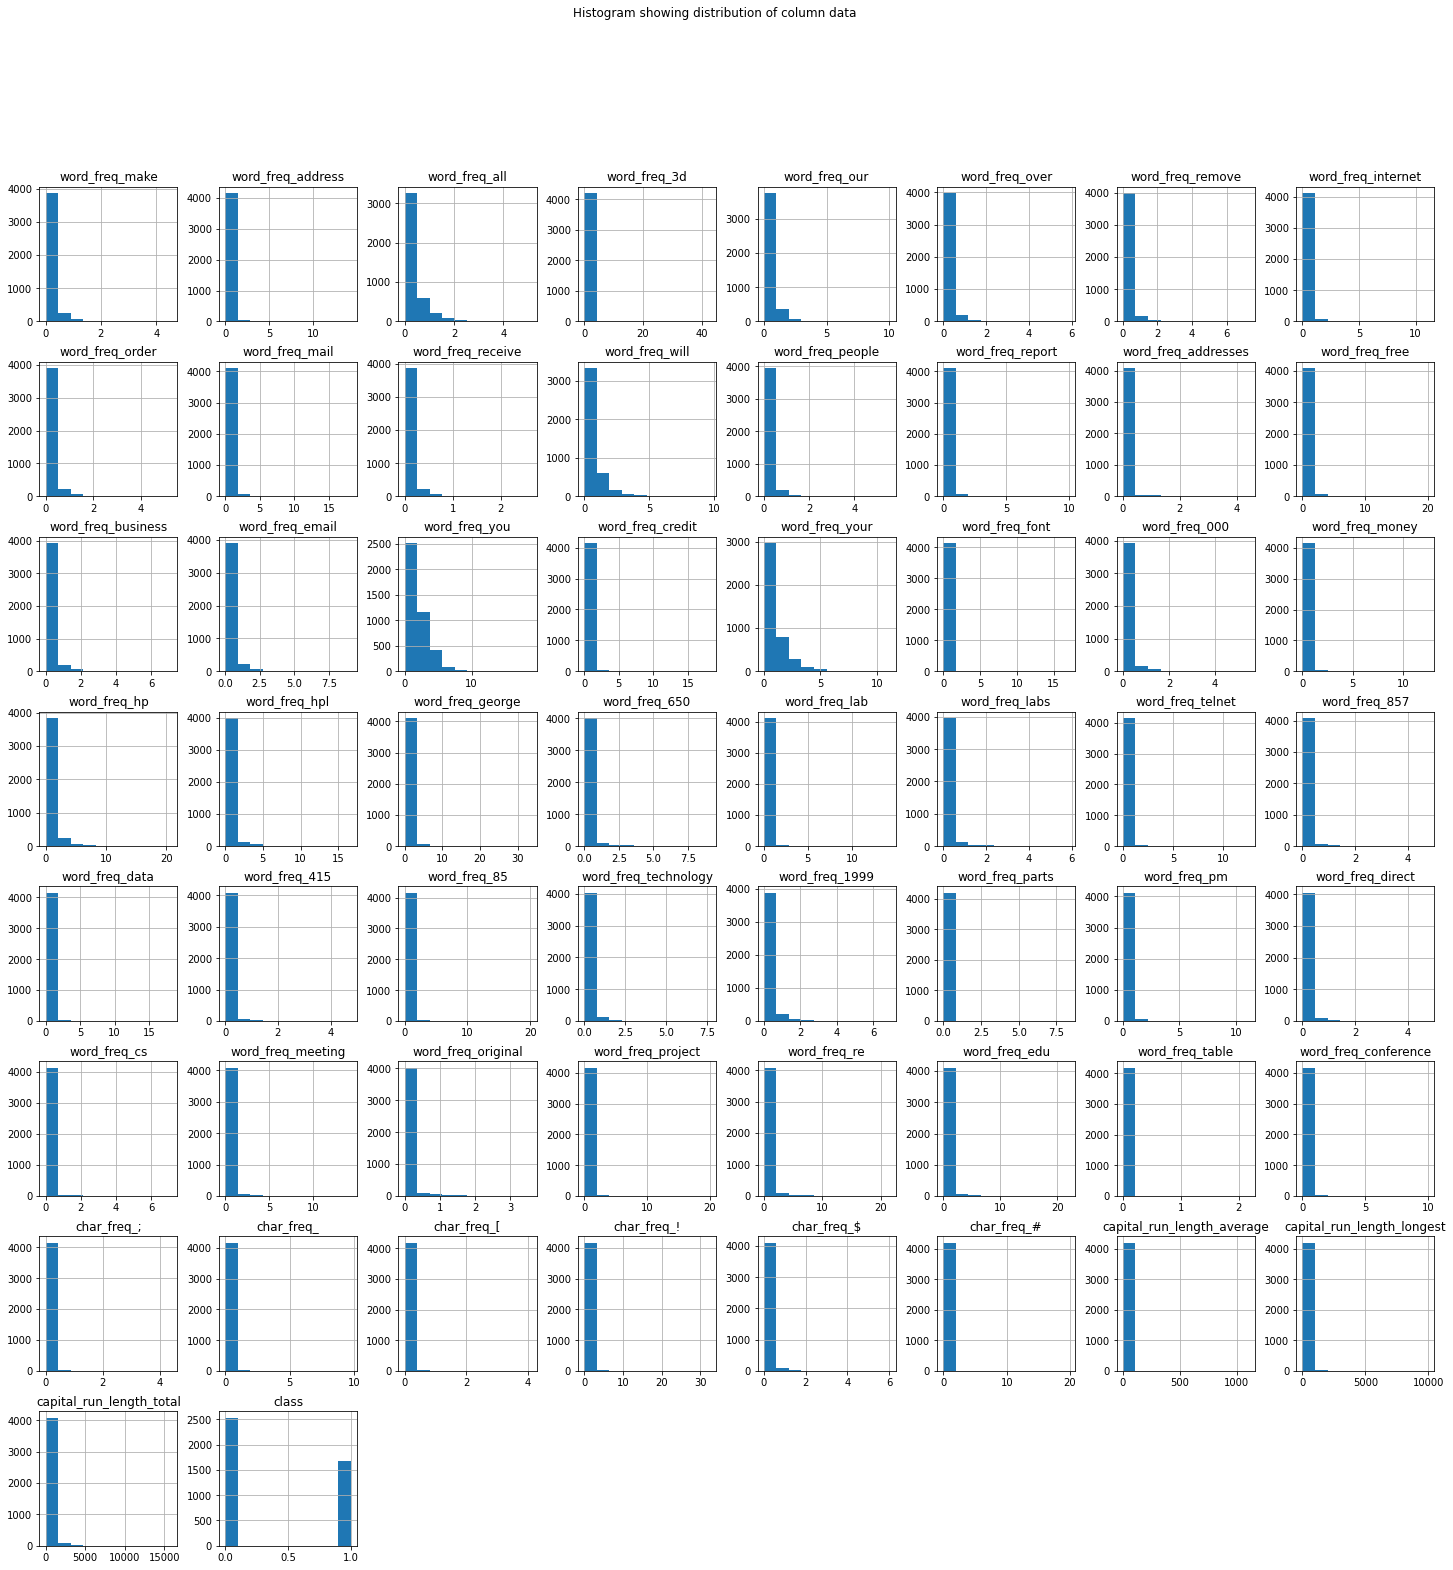

In [13]:
#Plotting a histogram to check for distribution across columns
data.hist(bins=10, figsize=(25,25))
plt.suptitle("Histogram showing distribution of column data")
plt.savefig('Histogram')
plt.show()
#The dataset doesn't have a normal distribution as it does not follow a bell shape

###Bivariate Analysis

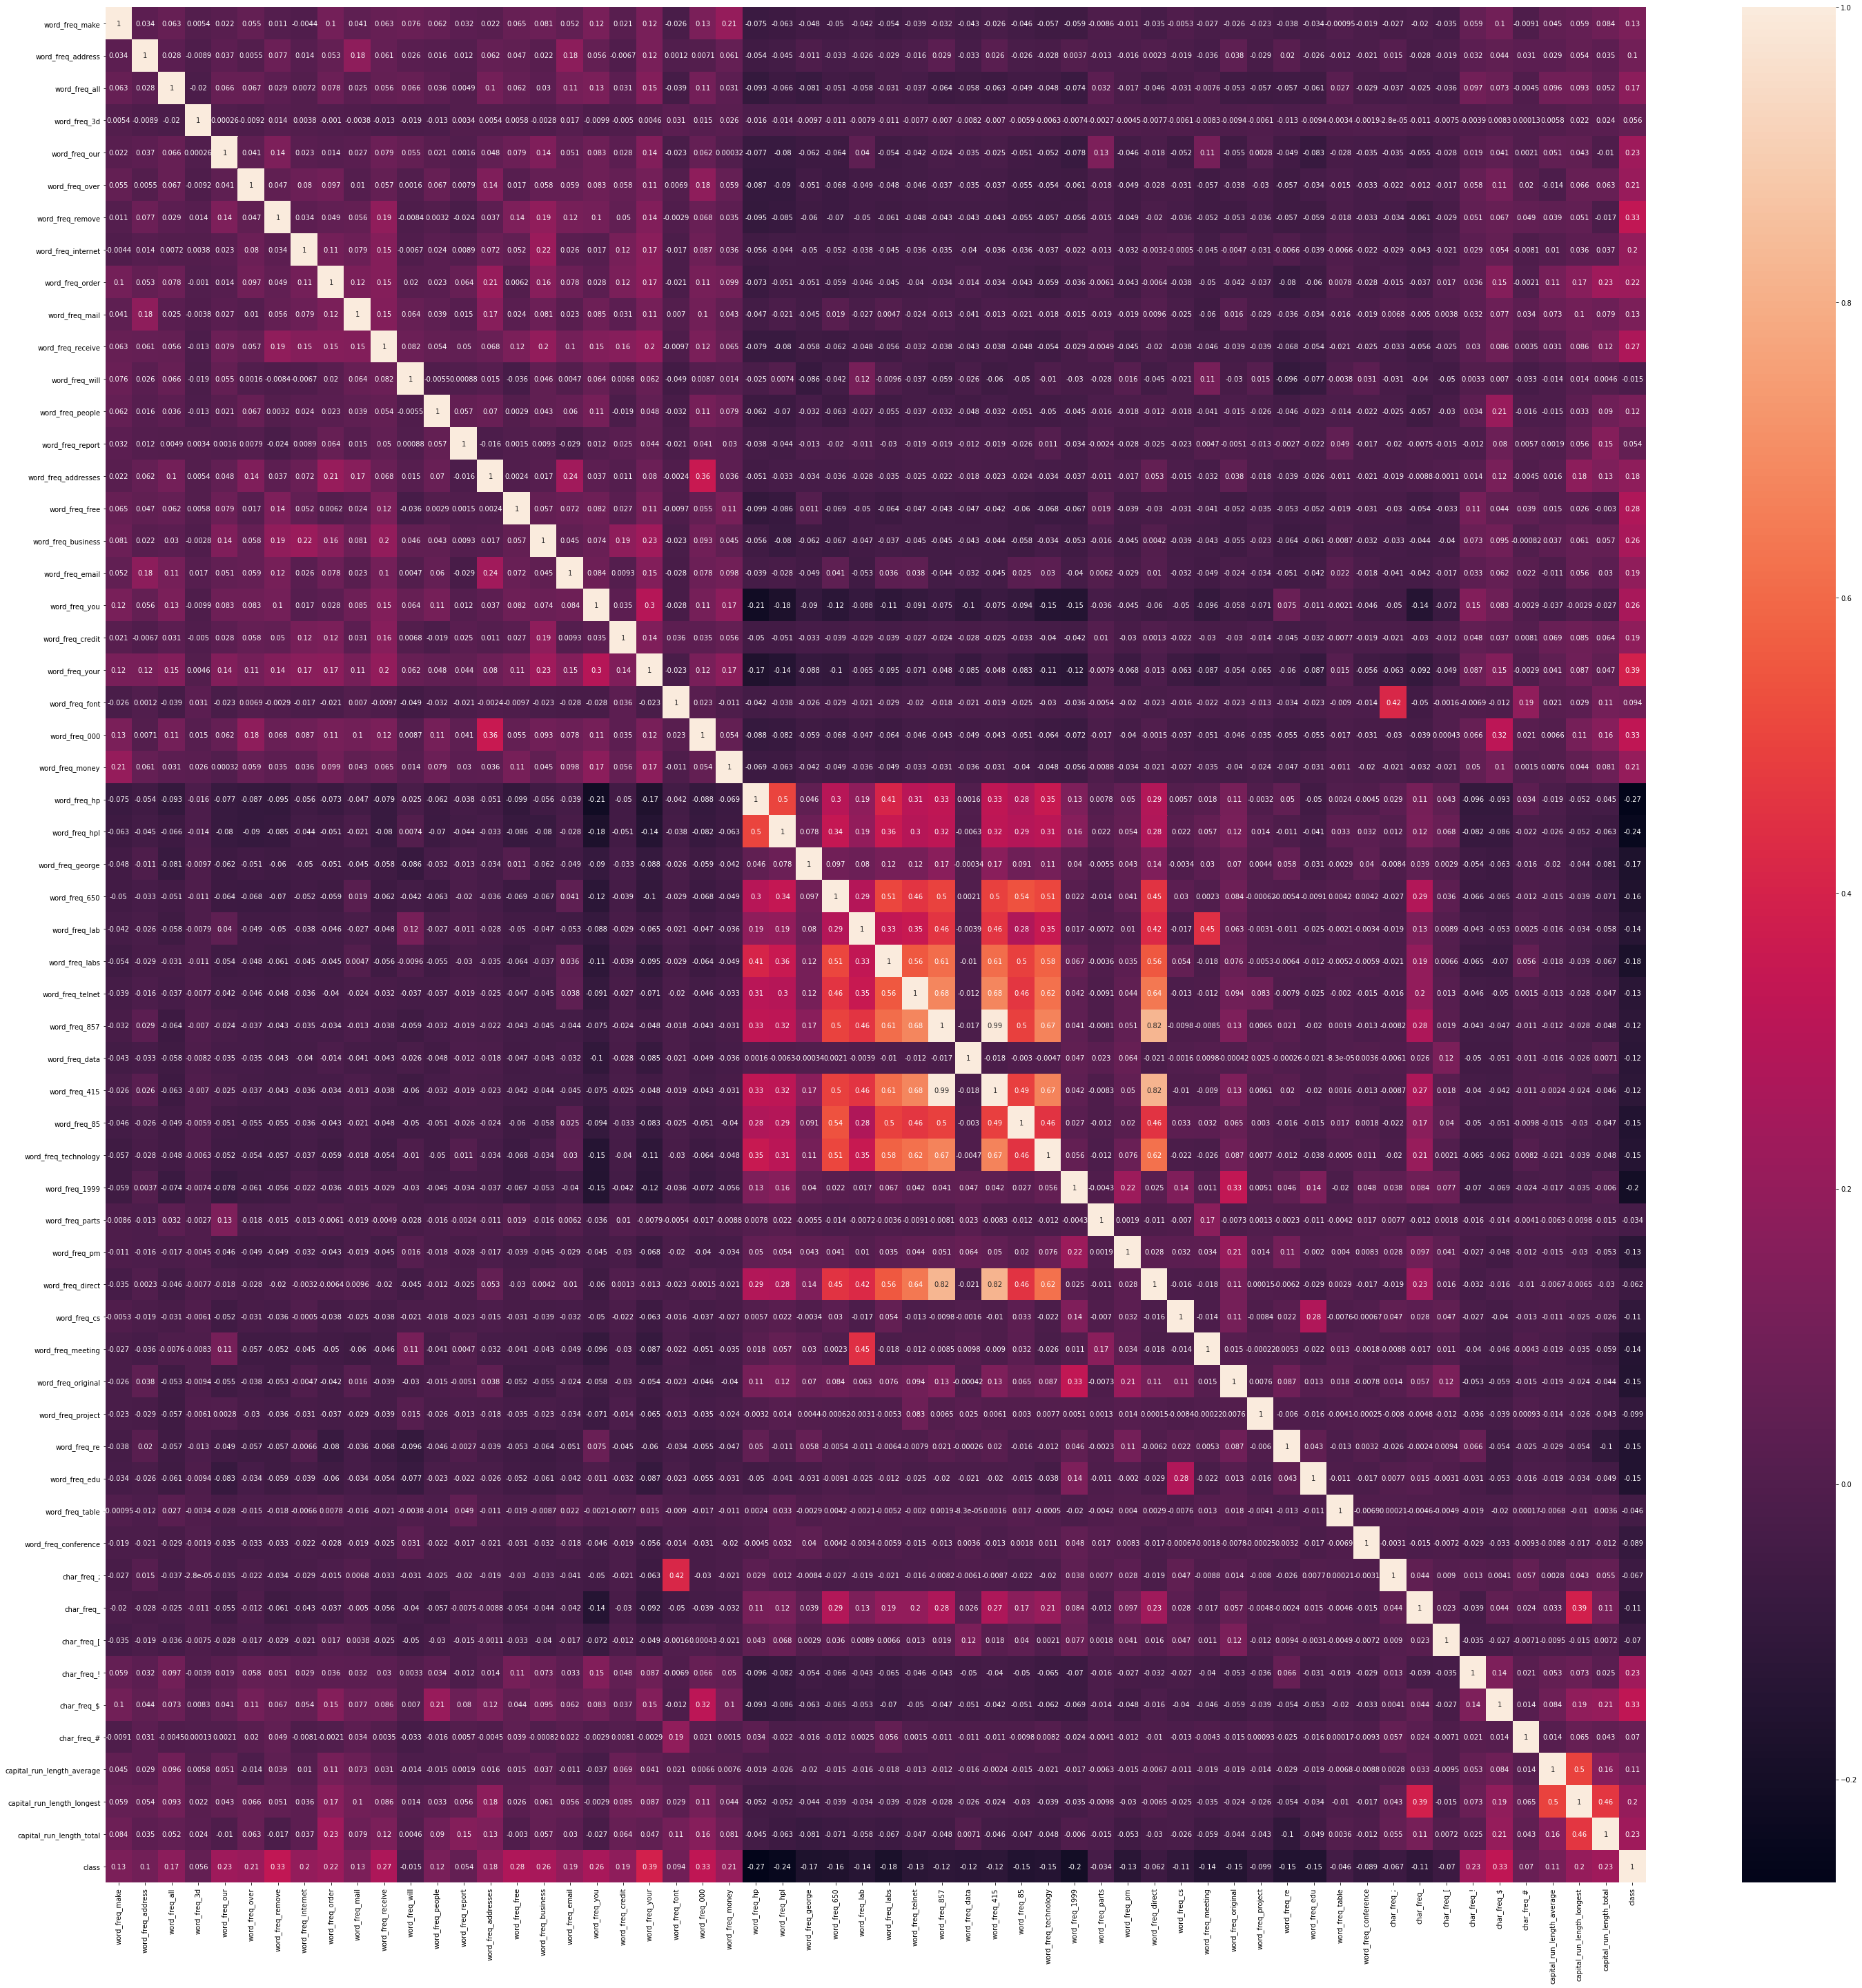

In [14]:
#Pearson's heatmap to check correlation between the variables
corr = data.corr() 
plt.figure(figsize = (50,50))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

###Linear Discriminant Analysis(Feature Engineering)

Our data is all numeric hence, we'll not need to do any encoding for the machine learning process

In [15]:
#Separating the target label (price) from the other features

feat = data.iloc[:,0:57]
label = data['class']
feat

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.78,0.00,0.00,3.76,61,278
1,0.21,0.28,0.50,0.00,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.00,0.43,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.00,0.37,0.18,0.05,5.11,101,1028
2,0.06,0.00,0.71,0.00,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.00,1.16,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.12,0.00,0.06,0.06,0.00,0.00,0.01,0.14,0.00,0.28,0.18,0.01,9.82,485,2259
3,0.00,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.14,0.00,0.00,3.54,40,191
4,0.00,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.14,0.00,0.00,3.54,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.00,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.31,0.31,0.00,0.00,0.00,0.23,0.00,0.00,0.00,0.00,1.14,3,88
4597,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.35,0.00,0.00,1.55,4,14
4598,0.30,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.20,0.00,0.00,0.10,0.72,0.00,0.00,0.00,0.00,1.40,6,118
4599,0.96,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.32,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,1.15,5,78


In [18]:
#Subject our frame to LDA model

#import LDA method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#creating an instance of LDA

lda = LDA()

lda_ = lda.fit(feat, label)
lda_feat = lda_.transform(feat)

#Displaying coefficients of the reducted columns
lda_.coef_

array([[-1.22262549e-01,  6.16545513e-02,  2.95436121e-01,
         1.24418991e-01,  7.44869753e-01,  1.07300402e+00,
         1.96699264e+00,  8.06390070e-01,  6.00602491e-01,
         6.26581450e-02,  1.33803186e+00, -2.67830595e-01,
         3.44529092e-02,  2.51088945e-02,  2.46288045e-01,
         7.88806178e-01,  4.44872213e-01,  4.34237408e-01,
         1.16798435e-01,  5.42626599e-01,  5.24869442e-01,
         4.27620498e-01,  1.55527481e+00,  6.92884323e-01,
        -2.19391868e-01, -1.83957067e-01, -1.76283931e-01,
         7.43620185e-02, -8.56509361e-02, -4.75852272e-01,
        -2.01334108e-01, -8.65131287e-03, -3.81424625e-01,
         3.06753428e-01, -3.01449924e-01,  2.22741588e-01,
        -4.57074064e-01, -5.26210221e-01, -1.60798817e-01,
         5.82959768e-01, -1.43610148e-01, -3.28325343e-01,
        -5.09672490e-01, -2.93666117e-01, -3.14655882e-01,
        -3.46930058e-01, -1.79628112e+00, -5.18733971e-01,
        -1.37727829e+00, -6.75539364e-01, -5.26871800e-0

In [19]:
new_df = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
new_df.sort_values(0, ascending=False)

,0
char_freq_$,2.38
word_freq_remove,1.97
word_freq_000,1.56
word_freq_receive,1.34
word_freq_over,1.07
word_freq_internet,0.81
word_freq_free,0.79
word_freq_our,0.74
word_freq_money,0.69
word_freq_order,0.60


**LDA INTERPRETATION**

From the feature engineering above and for purpose of scaling down our features, we'll pick only the first five columns that highly influence classification of a spam mail: char_freq_$, word_freq_remove, word_freq_000, word_freq_receive, word_freq_over which we'll now use as our independent variables for modelling.  

## 7. Implementing the Solution

On implementing the solution, we will use Naive Bayes Classifier.

###Gaussian Naive Bayes

In [23]:
#BASE MODEL OF 80/20
#Splitting the data into label and feature variables
X = data[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over']]
y = data['class']

# Splitting our data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

# Training our model

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
import numpy as np
y_pred = model.predict(X_test)
print(np.mean(y_pred == y_test))
# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

0.8064133016627079
Mean Absolute Error: 0.19358669833729217
Mean Squared Error: 0.19358669833729217
Root Mean Squared Error: 0.43998488421455134
The accuracy of the model is  0.8064133016627079

 Confusion matrix
[[493  22]
 [141 186]]

 Classification report
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       515
           1       0.89      0.57      0.70       327

    accuracy                           0.81       842
   macro avg       0.84      0.76      0.78       842
weighted avg       0.82      0.81      0.79       842



In [24]:
#BASE MODEL OF 70/30
#Splitting the data into labels and features
X = data[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over']]
y = data['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)

# Splitting our data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) 

# Training our model

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
import numpy as np
y_pred = model.predict(X_test)
print(np.mean(y_pred == y_test))
# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

0.7996832937450514
Mean Absolute Error: 0.20031670625494855
Mean Squared Error: 0.20031670625494855
Root Mean Squared Error: 0.4475675437908211
The accuracy of the model is  0.7996832937450514

 Confusion matrix
[[719  39]
 [214 291]]

 Classification report
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       758
           1       0.88      0.58      0.70       505

    accuracy                           0.80      1263
   macro avg       0.83      0.76      0.77      1263
weighted avg       0.82      0.80      0.79      1263



In [25]:
#BASE MODEL 60/40 SPLIT
#Splitting the data into labels and features
X = data[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over']]
y = data['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)

# Splitting our data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6) 

# Training our model

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
import numpy as np
y_pred = model.predict(X_test)
print(np.mean(y_pred == y_test))
# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

0.8028503562945368
Mean Absolute Error: 0.19714964370546317
Mean Squared Error: 0.19714964370546317
Root Mean Squared Error: 0.4440153642673451
The accuracy of the model is  0.8028503562945368

 Confusion matrix
[[953  50]
 [282 399]]

 Classification report
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1003
           1       0.89      0.59      0.71       681

    accuracy                           0.80      1684
   macro avg       0.83      0.77      0.78      1684
weighted avg       0.82      0.80      0.79      1684



####Hyperparameter Tuning


**GridSearchCV**

It is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. The performance of a model significantly depends on the value of hyperparameters. This will also help improve the accuracy of our model.

In [28]:
#MODEL WITH 80/20 SPLIT
#We'll now split the data into labels and features
X = data[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over']]
y = data['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)

#Splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


var_smoothing = list(range(-10, 10))

hyperparameters = dict(var_smoothing = var_smoothing)

classifier = GaussianNB()

clf = GridSearchCV(classifier, hyperparameters,cv=20)
clf = clf.fit(X_train, y_train)

print('\n')

print(clf.best_params_)
print('\n')

#Creating a better model based on the parameters given to us by the greadsearch
modelone = GaussianNB(var_smoothing = clf.best_params_['var_smoothing']).fit(X_train, y_train)
modelone

# predicting using the model built

y_pred = modelone.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())

# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))



{'var_smoothing': 0}




      Actual  Predicted
4061       0          1
2379       0          0
2709       0          0
210        1          1
3150       0          0
...      ...        ...
320        1          1
545        1          0
2727       0          0
3556       0          0
3451       0          0

[842 rows x 2 columns]


       Actual  Predicted
count  842.00     842.00
mean     0.41       0.28
std      0.49       0.45
min      0.00       0.00
25%      0.00       0.00
50%      0.00       0.00
75%      1.00       1.00
max      1.00       1.00
Mean Absolute Error: 0.19477434679334918
Mean Squared Error: 0.19477434679334918
Root Mean Squared Error: 0.44133246741356924
The accuracy of the model is  0.8052256532066508

 Confusion matrix
[[469  26]
 [138 209]]

 Classification report
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       495
           1       0.89      0.60      0.72       347

    accuracy                 

In [29]:
#MODEL WITH BASE - 70/30
#We'll now split the data into labels and features
X = data[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over']]
y = data['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)

#Splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)


var_smoothing = list(range(-10, 10))

hyperparameters = dict(var_smoothing = var_smoothing)

classifier = GaussianNB()

clf = GridSearchCV(classifier, hyperparameters,cv=20)
clf = clf.fit(X_train, y_train)

print('\n')

print(clf.best_params_)
print('\n')

#Creating a better model based on the parameters given to us by the greadsearch
modelone = GaussianNB(var_smoothing = clf.best_params_['var_smoothing']).fit(X_train, y_train)
modelone

# predicting using the model built

y_pred = modelone.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())

# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))



{'var_smoothing': 0}




      Actual  Predicted
4061       0          1
2379       0          0
2709       0          0
210        1          1
3150       0          0
...      ...        ...
753        1          1
2          1          1
296        1          1
4593       0          0
301        1          1

[1263 rows x 2 columns]


       Actual  Predicted
count 1263.00    1263.00
mean     0.42       0.29
std      0.49       0.45
min      0.00       0.00
25%      0.00       0.00
50%      0.00       0.00
75%      1.00       1.00
max      1.00       1.00
Mean Absolute Error: 0.18448139350752177
Mean Squared Error: 0.18448139350752177
Root Mean Squared Error: 0.42951297245545655
The accuracy of the model is  0.8155186064924782

 Confusion matrix
[[703  34]
 [199 327]]

 Classification report
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       737
           1       0.91      0.62      0.74       526

    accuracy                

In [30]:
#MODEL WITH 60/40 SPLIT
#We'll now split the data into labels and features
X = data[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over']]
y = data['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)

#Splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)


var_smoothing = list(range(-10, 10))

hyperparameters = dict(var_smoothing = var_smoothing)

classifier = GaussianNB()

clf = GridSearchCV(classifier, hyperparameters,cv=20)
clf = clf.fit(X_train, y_train)

print('\n')

print(clf.best_params_)
print('\n')

#Creating a better model based on the parameters given to us by the greadsearch
modelone = GaussianNB(var_smoothing = clf.best_params_['var_smoothing']).fit(X_train, y_train)
modelone

# predicting using the model built

y_pred = modelone.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())

# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))



{'var_smoothing': 0}




      Actual  Predicted
4061       0          1
2379       0          0
2709       0          0
210        1          1
3150       0          0
...      ...        ...
2611       0          0
1506       1          0
4140       0          0
2268       0          0
2554       0          0

[1684 rows x 2 columns]


       Actual  Predicted
count 1684.00    1684.00
mean     0.41       0.29
std      0.49       0.45
min      0.00       0.00
25%      0.00       0.00
50%      0.00       0.00
75%      1.00       1.00
max      1.00       1.00
Mean Absolute Error: 0.17992874109263657
Mean Squared Error: 0.17992874109263657
Root Mean Squared Error: 0.4241800809710854
The accuracy of the model is  0.8200712589073634

 Confusion matrix
[[943  51]
 [252 438]]

 Classification report
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       994
           1       0.90      0.63      0.74       690

    accuracy                 

**GAUSSIAN MODEL INTERPRETATION**

The base model with a 60/40 split performed well compared to the rest 80/20 and 70/30, the more it was balanced, the more it performed well. Also we got to improve on the accuracy of our model using the GridSearchCV model. There was an original accuracy of 80% but upon using GridSearchCV it improved to 82%. The model is a good fit and doesn't show any signs of overfitting or underfitting. 

###Bernoulli Naive Bayes

In [34]:
#We'll now split the data into labels and features
X = data[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over']]
y = data['class']

#Splitting our data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

#Training our model
clf = BernoulliNB()  
model = clf.fit(X_train, y_train) 

#Predicting our test predictors
import numpy as np
y_pred = model.predict(X_test)
print(np.mean(y_pred == y_test))

#comparing the actual and predicted
comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

0.8028503562945368
Mean Absolute Error: 0.19714964370546317
Mean Squared Error: 0.19714964370546317
Root Mean Squared Error: 0.4440153642673451
The accuracy of the model is  0.8028503562945368

 Confusion matrix
[[473  42]
 [124 203]]

 Classification report
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       515
           1       0.83      0.62      0.71       327

    accuracy                           0.80       842
   macro avg       0.81      0.77      0.78       842
weighted avg       0.81      0.80      0.80       842



In [35]:
#BASE MODEL OF 70/30
#We'll now split the data into labels and features
X = data[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over']]
y = data['class']

#Splitting our data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

#Training our model
clf = BernoulliNB()  
model = clf.fit(X_train, y_train) 

#Predicting our test predictors
import numpy as np
y_pred = model.predict(X_test)
print(np.mean(y_pred == y_test))

#comparing the actual and predicted
comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

0.8028503562945368
Mean Absolute Error: 0.19714964370546317
Mean Squared Error: 0.19714964370546317
Root Mean Squared Error: 0.4440153642673451
The accuracy of the model is  0.8028503562945368

 Confusion matrix
[[699  59]
 [190 315]]

 Classification report
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       758
           1       0.84      0.62      0.72       505

    accuracy                           0.80      1263
   macro avg       0.81      0.77      0.78      1263
weighted avg       0.81      0.80      0.80      1263



In [36]:
#BASE MODEL OF 60/40
#We'll now split the data into labels and features
X = data[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over']]
y = data['class']

#Splitting our data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)

#Training our model
clf = BernoulliNB()  
model = clf.fit(X_train, y_train) 

#Predicting our test predictors
import numpy as np
y_pred = model.predict(X_test)
print(np.mean(y_pred == y_test))

#comparing the actual and predicted
comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

0.8099762470308789
Mean Absolute Error: 0.19002375296912113
Mean Squared Error: 0.19002375296912113
Root Mean Squared Error: 0.4359171400267729
The accuracy of the model is  0.8099762470308789

 Confusion matrix
[[927  76]
 [244 437]]

 Classification report
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1003
           1       0.85      0.64      0.73       681

    accuracy                           0.81      1684
   macro avg       0.82      0.78      0.79      1684
weighted avg       0.82      0.81      0.80      1684



In [37]:
#We'll go straight ahead to do hyperparameter tuning using GridSearchCV for the best model which is BASE MODEL WITH 60/40 split.
#MODEL WITH 60/40 SPLIT
#We'll now split the data into labels and features
X = data[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over']]
y = data['class']

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)

#Splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#I used GridSearch to look for the best parameters


alpha= list(range(0, 10))
class_prior= [None]
fit_prior= [False, True]

hyperparameters = dict(alpha = alpha, class_prior = class_prior, fit_prior = fit_prior)

classifier = BernoulliNB()

clf = GridSearchCV(classifier, hyperparameters,cv=20)
clf = clf.fit(X_train, y_train)

print('\n')

print(clf.best_params_)
print('\n')

#Creating a better model based on the parameters given to us by the greadsearch
modelone = BernoulliNB(alpha = clf.best_params_['alpha'], class_prior = clf.best_params_['class_prior'], fit_prior = clf.best_params_['fit_prior']).fit(X_train, y_train)
modelone

# predicting using the model built

y_pred = modelone.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('\n')
print(comparison_frame)
print('\n')
print(comparison_frame.describe())

# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))



{'alpha': 0, 'class_prior': None, 'fit_prior': False}




      Actual  Predicted
4061       0          1
2379       0          0
2709       0          0
210        1          1
3150       0          1
...      ...        ...
2611       0          0
1506       1          1
4140       0          0
2268       0          0
2554       0          0

[1684 rows x 2 columns]


       Actual  Predicted
count 1684.00    1684.00
mean     0.41       0.35
std      0.49       0.48
min      0.00       0.00
25%      0.00       0.00
50%      0.00       0.00
75%      1.00       1.00
max      1.00       1.00
Mean Absolute Error: 0.1502375296912114
Mean Squared Error: 0.1502375296912114
Root Mean Squared Error: 0.38760486283225526
The accuracy of the model is  0.8497624703087886

 Confusion matrix
[[918  76]
 [177 513]]

 Classification report
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       994
           1       0.87      0.74      0.80       69

**Bernoulli Naive Bayes Interpretation**

The best model is still the one with 60/40 split and upon performing hyperparameter tuning, the model gets better with an accuracy score of 85%

##Conclusion

The best model was achieved with the Bernoulli Naive Bayes Model and it was improved by using GridSearchCV. The results we got were accurate and as expected.

